In [32]:
from astropy.io.fits import getdata
import numpy as np

In [33]:
data = getdata('StrayCats_SLsources_3arcminbkg.fits')

In [34]:
data.columns
#data = data[data['3-8 keV count/s/cm2'] < 2.]

ColDefs(
    name = 'StrayID'; format = '15A'
    name = 'SL Source'; format = '23A'
    name = 'SL Type'; format = '16A'
    name = 'ObsID'; format = '20A'
    name = 'Module'; format = '1A'
    name = 'MJD'; format = 'D'
    name = 'Exposure (s)'; format = 'D'
    name = 'Area (cm2)'; format = 'D'
    name = 'Total Counts (3-8 keV)'; format = 'D'
    name = 'Error Total Counts (3-8 keV)'; format = 'D'
    name = 'Total Counts (8-13 keV)'; format = 'D'
    name = 'Error Total Counts (8-13 keV)'; format = 'D'
    name = 'HR'; format = 'D'
    name = 'Error HR'; format = 'D'
    name = '3-8 keV count/s/cm2'; format = 'D'
    name = 'Error 3-8 keV count/s/cm2'; format = 'D'
    name = '8-13 keV count/s/cm2'; format = 'D'
    name = 'Error 8-13 keV count/s/cm2'; format = 'D'
    name = '3-8 keV bkgd count/s/cm2'; format = 'D'
    name = 'Error 3-8 keV bkgd count/s/cm2'; format = 'D'
    name = '8-13 keV bkgd count/s/cm2'; format = 'D'
    name = 'Error 8-13 keV bkgd count/s/cm2'; format =

In [35]:
src = data['3-8 keV count/s/cm2'] + data['8-13 keV count/s/cm2']
src_err = np.sqrt(data['Error 3-8 keV count/s/cm2']**2 + data['Error 8-13 keV count/s/cm2']**2)

bgd = data['3-8 keV bkgd count/s/cm2'] + data['8-13 keV bkgd count/s/cm2']
bgd_err = np.sqrt(data['Error 3-8 keV bkgd count/s/cm2']**2 + data['Error 8-13 keV count/s/cm2']**2)

In [57]:
import matplotlib.pyplot as plt
from matplotlib import rc_params
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1    
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12

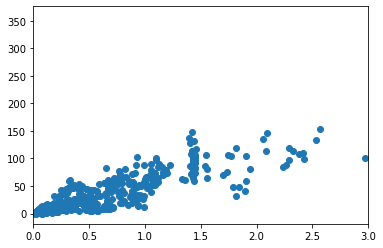

In [49]:
delta = src - bgd
sig = np.sqrt(bgd_err**2 + src_err**2)

snr = delta / sig

ax = plt.figure().subplots()
ax.scatter(src, snr)
ax.set_xlim(0, 3)
plt.show()

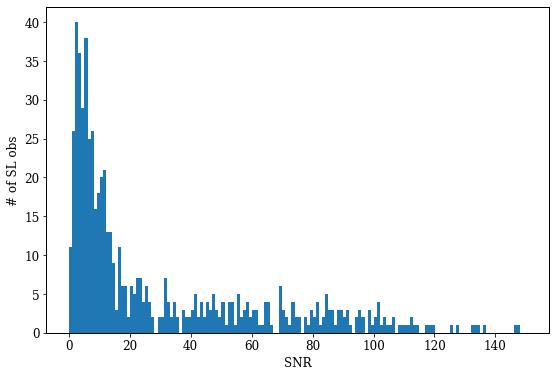

In [59]:
delta = src - bgd
sig = np.sqrt((1.0*bgd_err)**2 + src_err**2)

snr = delta / sig

ax = plt.figure(figsize=(9, 6)).subplots()
ax.hist(snr, range=[0.1, 150], bins=150)
ax.set_xlabel('SNR')
ax.set_ylabel('# of SL obs')
#ax.set_xscale('Log')
#ax.set_yscale('Log')

#ax.set_xlim(0, 20)
plt.savefig('SNR_hist.pdf')

plt.show()